In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

In [19]:
(train_X_cifar, train_Y_cifar), (test_X_cifar, test_Y_cifar) = tf.keras.datasets.cifar10.load_data()

# Normalize the data to [0,1] range
train_X_cifar = train_X_cifar.astype('float32') / 255.0
test_X_cifar = test_X_cifar.astype('float32') / 255.0

# One-hot encode the labels
lb_cifar = LabelBinarizer()
train_Y_cifar = lb_cifar.fit_transform(train_Y_cifar)
test_Y_cifar = lb_cifar.transform(test_Y_cifar)

In [20]:
# Initialize a sequential model
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),   # Flatten the 3D image to 1D
    Dense(512, activation='relu'),      # Hidden layer with 512 neurons
    Dense(256, activation='relu'),      # Another hidden layer with 256 neurons
    Dense(128, activation='relu'),      # Additional hidden layer with 128 neurons
    Dense(10, activation='softmax')     # Output layer for 10 classes
])

In [21]:
# Compile the model (using Adam optimizer)
model.compile(optimizer=Adam(), 
              loss='categorical_crossentropy',  # Change to categorical_crossentropy
              metrics=['accuracy'])

# Train the model
history = model.fit(train_X_cifar, train_Y_cifar, epochs=15, validation_data=(test_X_cifar, test_Y_cifar))

Epoch 1/15
1563/1563 [==============================] - 58s 35ms/step - loss: 1.8654 - accuracy: 0.3190 - val_loss: 1.6973 - val_accuracy: 0.3960
Epoch 2/15
1563/1563 [==============================] - 54s 35ms/step - loss: 1.6799 - accuracy: 0.3956 - val_loss: 1.6195 - val_accuracy: 0.4234
Epoch 3/15
1563/1563 [==============================] - 56s 36ms/step - loss: 1.5995 - accuracy: 0.4272 - val_loss: 1.5508 - val_accuracy: 0.4459
Epoch 4/15
1563/1563 [==============================] - 56s 36ms/step - loss: 1.5409 - accuracy: 0.4489 - val_loss: 1.5170 - val_accuracy: 0.4602
Epoch 5/15
1563/1563 [==============================] - 55s 35ms/step - loss: 1.4916 - accuracy: 0.4655 - val_loss: 1.5151 - val_accuracy: 0.4657
Epoch 6/15
1563/1563 [==============================] - 53s 34ms/step - loss: 1.4626 - accuracy: 0.4748 - val_loss: 1.5412 - val_accuracy: 0.4444
Epoch 7/15
1563/1563 [==============================] - 55s 35ms/step - loss: 1.4312 - accuracy: 0.4878 - val_loss: 1.4639 -

In [41]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_X_cifar, test_Y_cifar)
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 3s 9ms/step - loss: 1.4178 - accuracy: 0.5062
Test accuracy: 0.5062000155448914


In [43]:
predictions_cifar = model.predict(test_X_cifar)

# Convert probabilities to class labels
predicted_classes_cifar = predictions_cifar.argmax(axis=1)
true_classes_cifar = test_Y_cifar.argmax(axis=1)

report_cifar = classification_report(true_classes_cifar, predicted_classes_cifar)
print(report_cifar)

313/313 [==============================] - 3s 9ms/step
              precision    recall  f1-score   support

           0       0.53      0.62      0.57      1000
           1       0.64      0.61      0.62      1000
           2       0.40      0.36      0.38      1000
           3       0.35      0.38      0.36      1000
           4       0.52      0.32      0.40      1000
           5       0.40      0.39      0.39      1000
           6       0.55      0.54      0.54      1000
           7       0.56      0.58      0.57      1000
           8       0.56      0.70      0.62      1000
           9       0.55      0.57      0.56      1000

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.50     10000
weighted avg       0.51      0.51      0.50     10000



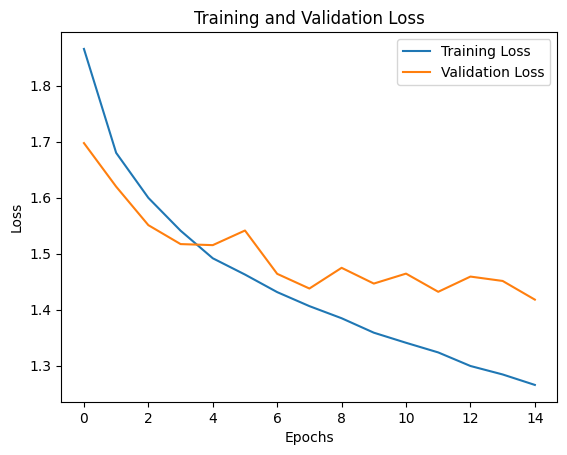

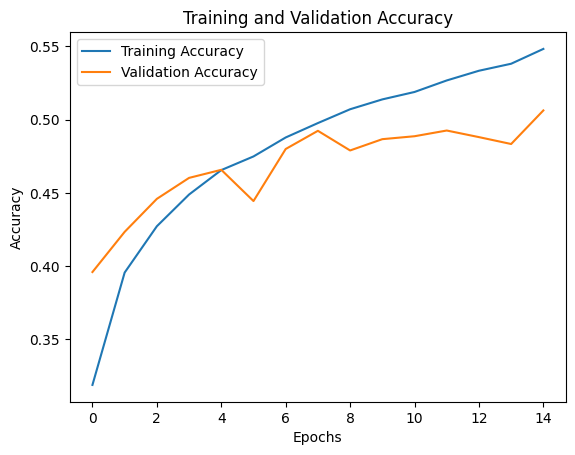

In [44]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 49ms/step


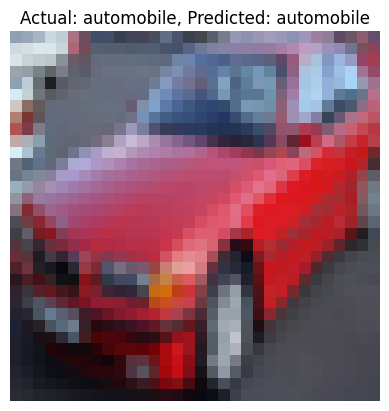

1/1 [==============================] - 0s 63ms/step


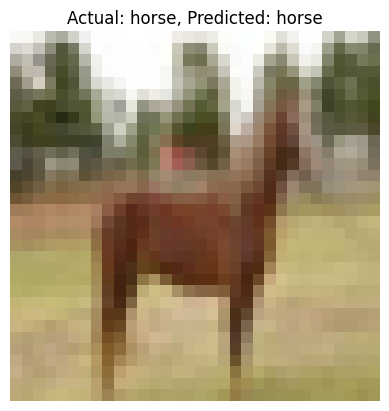

1/1 [==============================] - 0s 65ms/step


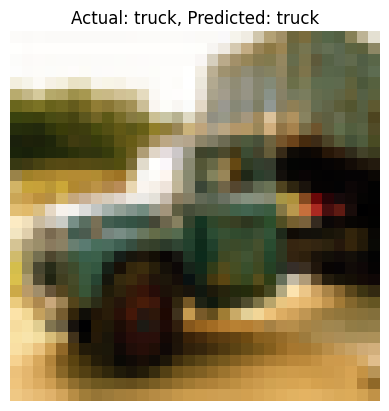

In [27]:
import numpy as np
import random

# Define the class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Select random indices for test images
random_indices = random.sample(range(x_test.shape[0]), 3)

# Display predictions for a few random images
for i, index in enumerate(random_indices):
    img = x_test[index]  # Get the image from the test set
    true_label = y_test[index][0]  # True label of the image
    prediction = model.predict(np.expand_dims(img, axis=0))  # Model prediction
    predicted_label = np.argmax(prediction)  # Get index of the highest probability

    # Display the image and predicted vs. actual label
    plt.imshow(img)
    plt.title(f"Actual: {class_names[true_label]}, Predicted: {class_names[predicted_label]}")
    plt.axis('off')
    plt.show()